# 聚类分析

## 主要程序部分

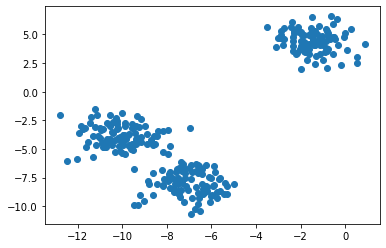

In [1]:
from matplotlib import pyplot as plt
import pylab as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
import numpy as np

X, labels = make_blobs(n_samples=300, centers=3, n_features=2, random_state=1)
data = np.hstack((X, labels.reshape(300, 1)))
data = pd.DataFrame(
    data,
    columns=['x', 'y', 'labels']
    #                     index=['数据{}'.format(i) for i in range(1, 301)]
)
fig, ax1 = plt.subplots(1)
ax1.scatter(data['x'], data['y'])
plt.show()

## 基本属性

In [2]:
n_clusters = 3
res = KMeans(n_clusters=n_clusters, random_state=1).fit(X)
#查看预测标签
res.labels_
pre_label = res.labels_

In [3]:
#查看聚类中心  簇心
centers = res.cluster_centers_

int, instance RandomState ou Aucun, par défaut = Aucun
    Détermine la génération de nombres aléatoires pour l'initialisation du centroïde. Utilisation
    un int pour rendre le caractère aléatoire déterministe.

In [4]:
#查看总距离平方和inertia
res.inertia_

573.9391587506091

## 绘图

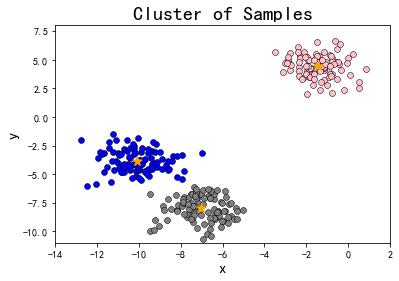

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
colors = ['pink', 'grey', 'blue', 'yellow', 'purple']
fig, ax = plt.subplots(1)
for i in range(n_clusters):
    ax.scatter(X[pre_label == i, 0],
               X[pre_label == i, 1],
               color=colors[i],
               linewidth=0.5,
               edgecolor='k')
ax.scatter(
    centers.T[0],
    centers.T[1],
    marker='*',
    s=100,
    color='orange',
)
plt.title('Cluster of Samples', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-14, 2)
plt.ylim(-11, 8)
plt.show()

## 效果评定

\begin{equation*}a为样本自身与同类簇中其他数据点的距离的平均值，为相近度\end{equation*}
\begin{equation*}b为样本自身与非同类簇中其他数据点的距离的平均值，为相近度\end{equation*}
\begin{equation*}b越大说明区分度越好，分类效果越好\end{equation*}
定义一个函数S
\begin{equation*}
S=(b-a)/max\{a,b\}
\end{equation*}
显然：\begin{equation*}-1<=S<=1\end{equation*}
如果\begin{equation*}S>0\end{equation*}说明两个簇存在明显区分度，
S越接近1，区分度与明显，分类效果越好

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
#返回所有轮廓系数的均值
silhouette_score(X, pre_label)
#返回样本点的所有轮廓系数
silhouette_samples(X, pre_label)

array([0.73299085, 0.74990997, 0.63370325, 0.90220505, 0.90691927,
       0.90516336, 0.67443991, 0.87852766, 0.86829166, 0.72905861,
       0.73674225, 0.68385259, 0.55779989, 0.72623171, 0.65158542,
       0.90248171, 0.49329472, 0.40973691, 0.90358868, 0.7534446 ,
       0.17725626, 0.74580584, 0.85079291, 0.90641117, 0.83950934,
       0.69059231, 0.66108476, 0.89361173, 0.71954907, 0.66103642,
       0.88421833, 0.74677648, 0.72564085, 0.54430541, 0.6661523 ,
       0.56946611, 0.44338087, 0.87092605, 0.42859637, 0.82115253,
       0.77803675, 0.54926257, 0.89657766, 0.87559126, 0.70260296,
       0.57338833, 0.88829976, 0.7067163 , 0.69903492, 0.64316892,
       0.65229266, 0.70882534, 0.69608713, 0.49420332, 0.82697928,
       0.66945662, 0.79141309, 0.71693006, 0.90057485, 0.74281035,
       0.53180517, 0.71629051, 0.7204979 , 0.8785823 , 0.88400818,
       0.75566447, 0.70877792, 0.88545112, 0.56729821, 0.65277429,
       0.82890045, 0.89595573, 0.89142631, 0.66580274, 0.84099

In [7]:
data.to_excel(r'./test.xlsx')

\begin{equation*}
样本点的轮廓系数都大于零，说明每个样本点与 除自身所在簇外  有明显区分度  分类情况比较好
\end{equation*}


# 完整代码

In [46]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
colors = ['pink', 'grey', 'blue', 'yellow', 'purple', 'brown', 'cyan']
data = pd.read_excel(r'./test.xlsx', )
X = scale(data.values, axis=0)  #z-score

## 简单绘图观察图像

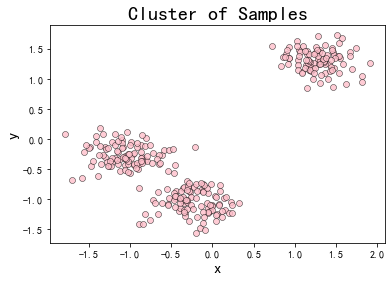

In [47]:
plt.scatter(X.T[0],
            X.T[1],
            linewidth=0.5,
            edgecolor='k',
            color=colors[0],
            alpha=0.8)
plt.title('Cluster of Samples', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

<!-- # 确定分类个数 -->

## 确定分类个数

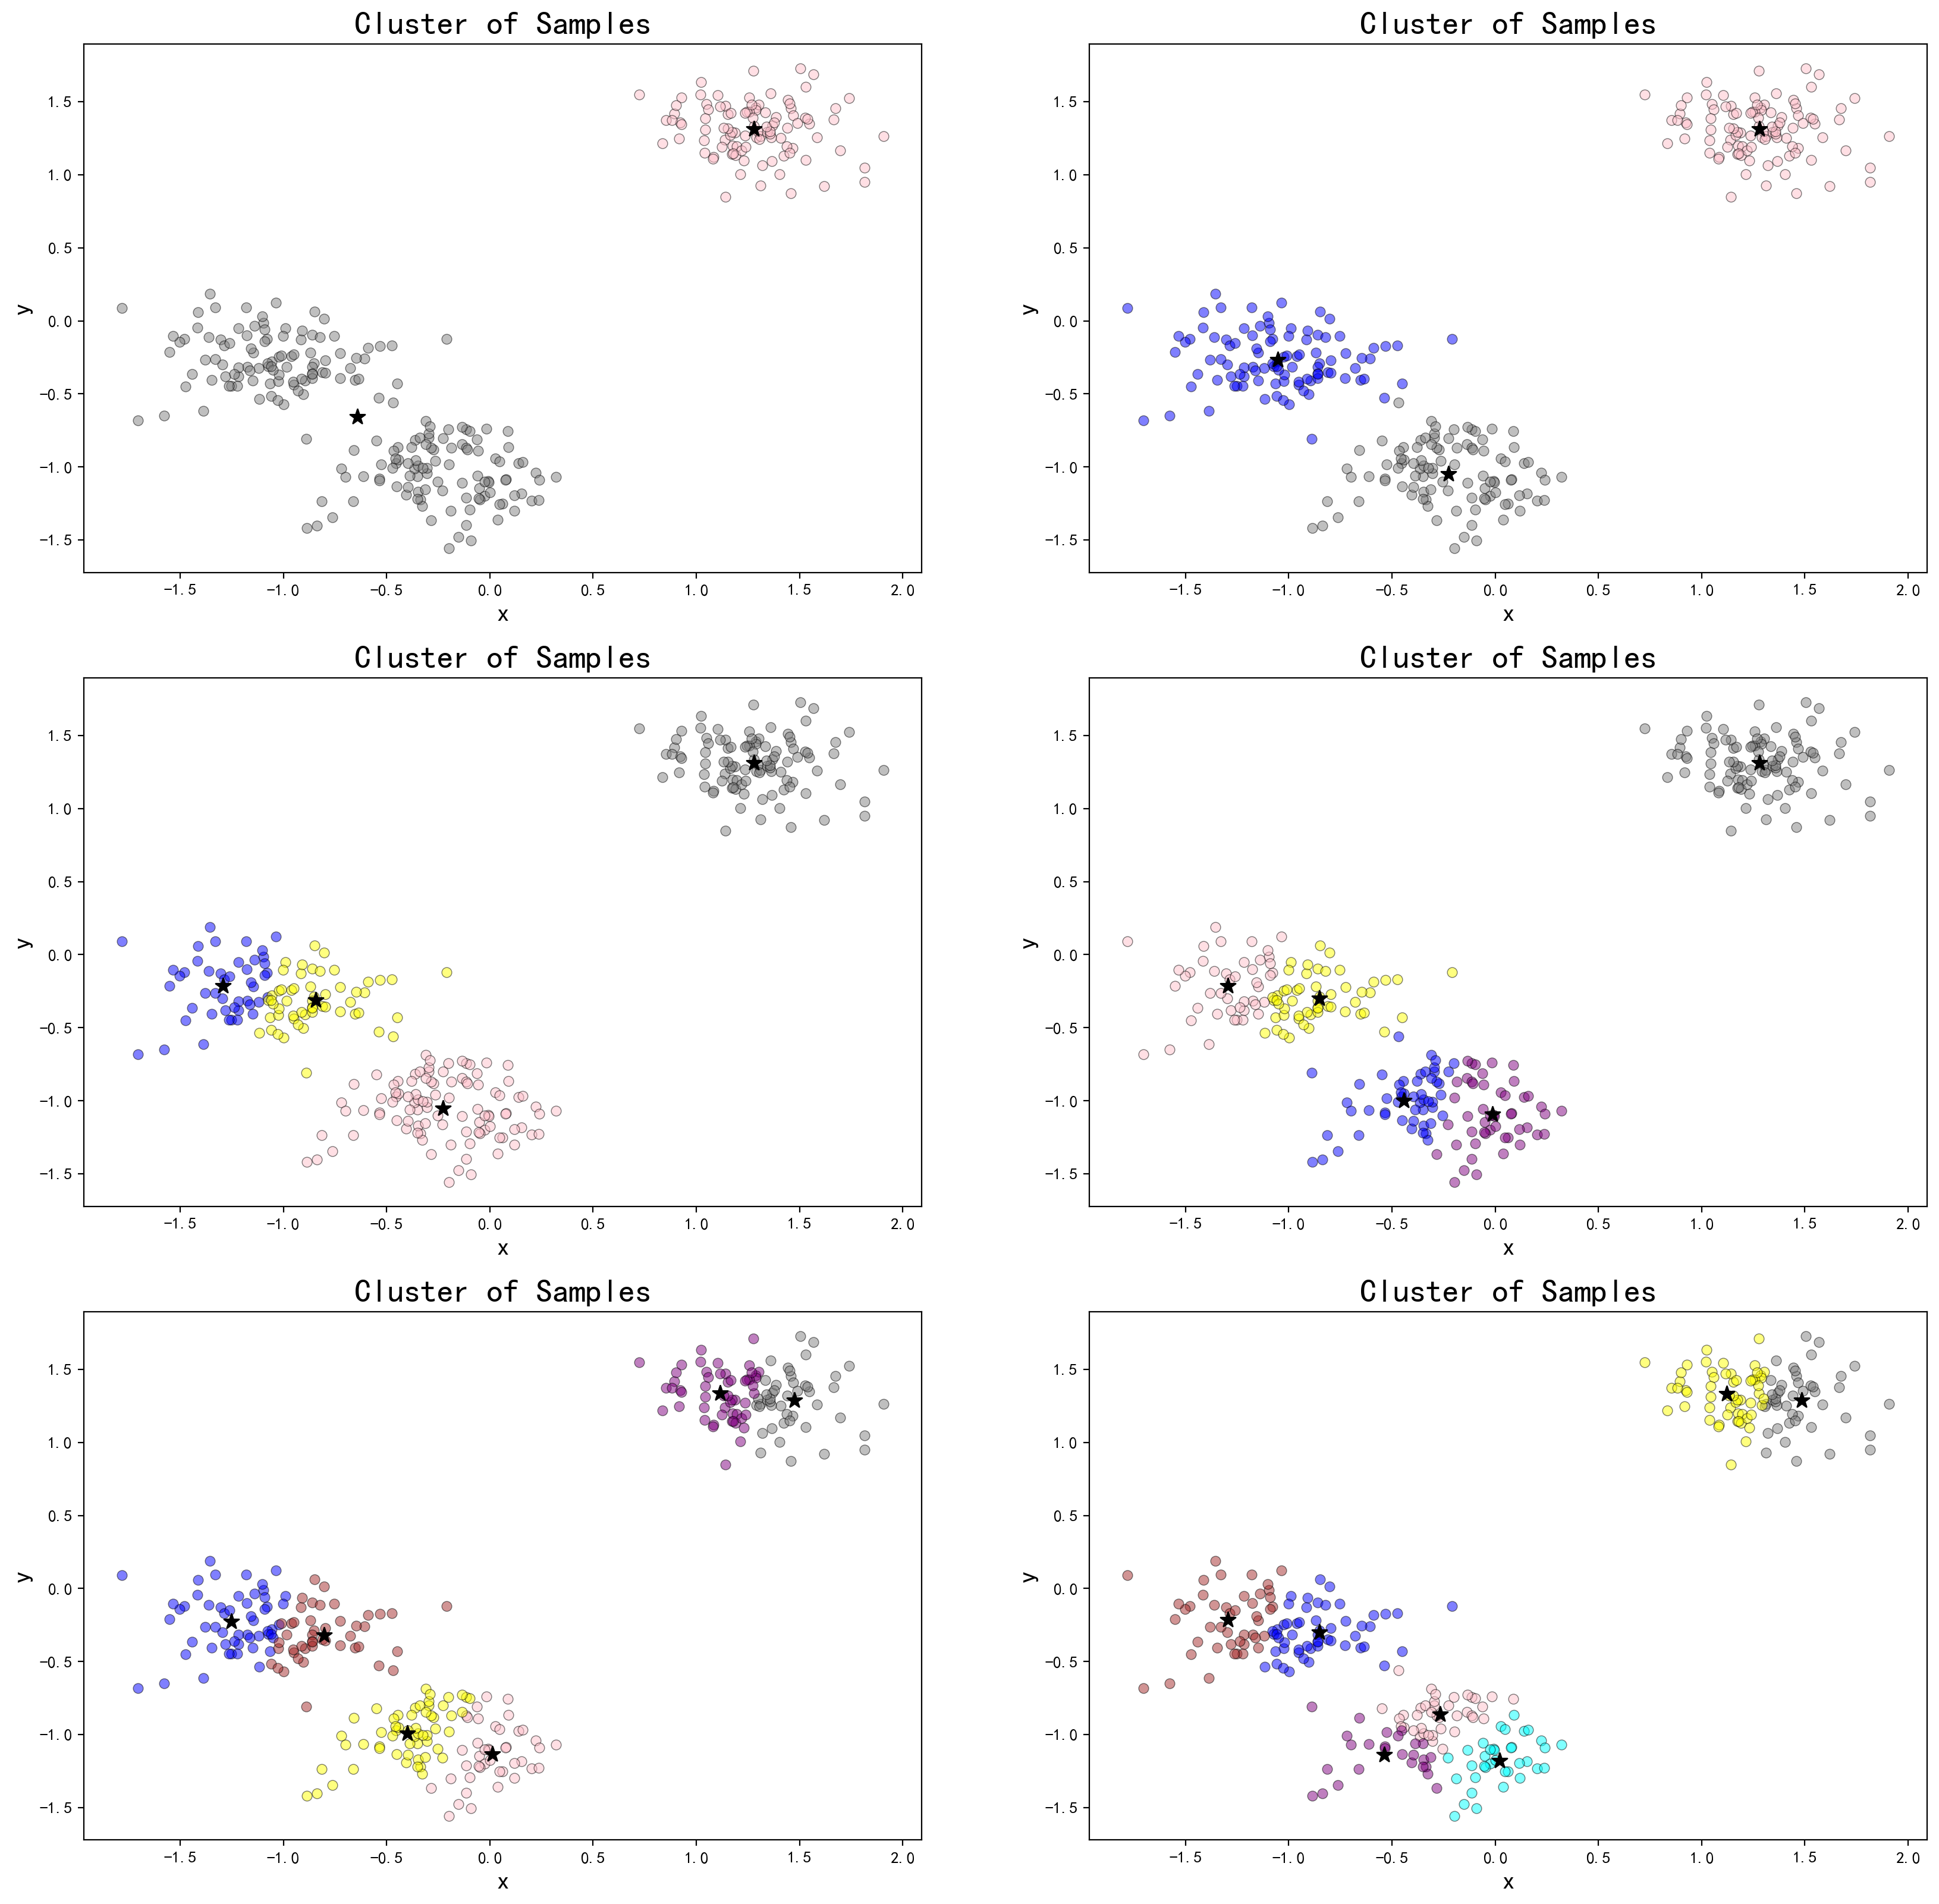

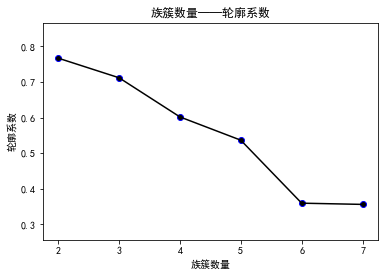

In [48]:
plt.figure(figsize=(20, 20), dpi=200)
silhouette = []
for i in range(2, 8):
    cluster = KMeans(n_clusters=i, random_state=1).fit(X)
    label = cluster.labels_
    centers = cluster.cluster_centers_
    silhouette.append(silhouette_score(X, label))
    plt.subplot(3, 2, i - 1)
    for i in range(i):
        plt.scatter(X[label == i, 0],
                    X[label == i, 1],
                    linewidth=0.5,
                    edgecolor='k',
                    color=colors[i],
                    alpha=0.5)
        plt.title('Cluster of Samples', fontsize=20)
        plt.xlabel('x', fontsize=15)
        plt.ylabel('y', fontsize=15)
#         plt.xlim(-14,2)
#         plt.ylim(-13,8)
    plt.scatter(centers.T[0], centers.T[1], marker='*', s=90, color='k')
plt.show()
plt.plot(range(2, 8), silhouette, color='k')
plt.scatter(range(2, 8), silhouette, color='k', edgecolor='b')
plt.title("族簇数量——轮廓系数")
plt.ylim(min(silhouette) - 0.1, max(silhouette) + 0.1)
plt.xlabel('族簇数量')
plt.ylabel('轮廓系数')
plt.show()

In [1]:
X

NameError: name 'X' is not defined